#Smart Aquatic Ecosystem Optimization using Unsupervised Machine Learning
Atul Uppin - ENG20DS0009

RR Devaprasad - ENG20DS0033

Ayush Branwal - ENG20DS0011

Rishank Gautam - ENG20DSDS0035

######**The purpose of our project is :**
To help people predict the best type of fish to be cultivated in the particular habitat depending on the environmental variables.
To help people do efficient fish farming or aquaculture.
######Major problem in fish farming is the lack of availability of good-quality stock. To overcome this problem, ways have now been worked out to breed these fish in ponds using hormonal stimulation. This has ensured the supply of pure fish stock in desired quantities.
######**Methods:** Using Data Visualization and Data Processing, Unsupervised Algorithms and analyze the clustering of unlabeled datasets by K Means Clustering Algorithm and Hierarchical. Finally, applying Logistic Regression to real- world problems.

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd

#For Data  visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

#For interactivity
import ipywidgets
from ipywidgets import interact

##Reading the Data

In [ ]:
#Reading the dataset
data=pd.read_csv('/content/Fish_recommendation.csv')

#Checking the shape of Data
print(data.shape)

(2200, 8)


In [ ]:
data.head(10)

,Ammonia,Nitrite,Nitrate,temperature,humidity,ph,rainfall,label
0,60,12,13,20.879744,82.002744,6.502985,202.935536,Archerfish
1,55,28,11,21.770462,80.319644,7.038096,226.655537,Archerfish
2,30,25,14,23.004459,82.320763,7.840207,263.964248,Archerfish
3,44,5,10,26.491096,80.158363,6.980401,242.864034,Archerfish
4,48,12,12,20.130175,81.604873,7.628473,262.717340,Archerfish
5,39,7,12,23.058049,83.370118,7.073454,251.055000,Archerfish
6,39,25,8,22.708838,82.639414,5.700806,271.324860,Archerfish
7,64,23,10,20.277744,82.894086,5.718627,241.974195,Archerfish
8,59,24,8,24.515881,83.535216,6.685346,230.446236,Archerfish
9,38,28,8,23.223974,83.033227,6.336254,221.209196,Archerfish


######Ammonia - Ratio of Ammonia in water
######Nitrite - Ratio of Nitrite in water
######Nitrate - Ratio of Nitrate in water
######temperature - Temperature in Degree
######Humidity - Reletive humidity in %
######ph - pH value of Water
######rainfall - Rainfall in mm
######Label - Names of different types of fishes

In [ ]:
#to check if there is any missing values in the Dataset
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Ammonia  Nitrite  Nitrate  temperature  humidity     ph  rainfall  label
0       False    False    False        False     False  False     False  False
1       False    False    False        False     False  False     False  False
2       False    False    False        False     False  False     False  False
3       False    False    False        False     False  False     False  False
4       False    False    False        False     False  False     False  False
...       ...      ...      ...          ...       ...    ...       ...    ...
2195    False    False    False        False     False  False     False  False
2196    False    False    False        False     False  False     False  False
2197    False    False    False        False     False  False     False  False
2198    False    False    False        False     False  False     False  False
2199    False    False    False        False     False  False     Fal

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ammonia      2200 non-null   int64  
 1   Nitrite      2200 non-null   int64  
 2   Nitrate      2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#Cheching the type of fishes pesent in the dataset
data['label'].value_counts()

Archerfish              100
Goldfish                100
Bettas                  100
Clown Loaches,          100
Black Molly             100
Danios                  100
pumpkinseed fish        100
rosy red minnow         100
Barramundi              100
Largemouth Bass         100
Tilapia                 100
Catfish                 100
Golden Rainbow Trout    100
Sticklebacks            100
Fathead Minnows         100
Bluegills               100
Redears                 100
Koi                     100
Rosy Red Minnows        100
Sterlets                100
Rosy Barb               100
Rams                    100
Name: label, dtype: int64

##Descriptive Statistics

In [ ]:
#Checking summary of all the Fishes
print("Average Ratio of Ammonia in water: {0:.2f}". format(data['Ammonia'].mean()))
print("Average Ratio of Nitrite in water: {0:.2f}". format(data['Nitrite'].mean()))
print("Average Ratio of Nitrate in water: {0:.2f}". format (data['Nitrate'].mean()))
print("Average Tempature in Celsius: {0:.2f}". format(data['temperature'].mean()))
print("Average Relative Humidity in %: {0:.2f}". format (data['temperature'].mean()))
print("Average Tempature in Celsius: {0:.2f}". format(data['humidity'].mean()))
print("Average PH Value of the water: {0:.2f}". format(data['ph'].mean()))
print("Average Rainfall in mm: {0:.2f}". format (data['rainfall'].mean()))

Average Ratio of Ammonia in water: 20.55
Average Ratio of Nitrite in water: 23.36
Average Ratio of Nitrate in water: 18.15
Average Tempature in Celsius: 25.62
Average Relative Humidity in %: 25.62
Average Tempature in Celsius: 71.48
Average PH Value of the water: 6.47
Average Rainfall in mm: 103.46


In [ ]:
#Checking the summary statistics for each Fish
@interact
def summary(Fishes = list(data['label'].value_counts().index)):
  x = data[data['label'] == Fishes]
  print("---------------------------------------------------")
  print("Statistics for Ammonia")
  print("Minimum Ammonia required ", x['Ammonia'].min())
  print("Average Ammonia required ", x['Ammonia'].mean())
  print("Maximum Ammonia required", x['Ammonia'].max())
  print("---------------------------------------------------")
  print("Statistics for Nitrite")
  print("Minimum Nitrite required", x['Nitrite'].min())
  print("Average Nitrite required:", x['Nitrite'].mean())
  print("Maximum Nitrite required :", x['Nitrite'].max())
  print("---------------------------------------------------")
  print("Statistics for Nitrate")
  print("Minimum Nitrate required :", x['Nitrate'].min())
  print("Average Nitrate required", x['Nitrate'].mean())
  print("Maximum Nitrate required", x['Nitrate'].max())
  print("---------------------------------------------------")
  print("Statistics for Temperature")
  print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
  print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
  print("Maximum Temperature required: {0:.2f}".format(x['temperature'].max()))
  print("---------------------------------------------------")
  print("Statistics for Humidity")
  print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
  print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
  print("Maximum Humidity required: {0:.2f}".format(x['humidity'].max()))
  print("---------------------------------------------------")
  print("Statistics for PH")
  print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
  print("Average PH required: {0:.2f}".format(x['ph'].mean()))
  print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
  print("---------------------------------------------------")
  print("Statistics for Rainfall")
  print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))
  print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
  print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='Fishes', options=('Archerfish', 'Goldfish', 'Bettas', 'Clown Loach…

In [ ]:
#Comparing the average requirement for each Fish with average conditions.
@interact
def compare(conditions = ['Ammonia', 'Nitrite', 'Nitrate', 'temperature', 'ph', 'humidity', 'rainfall']):
  print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
  print("---------------------------------------------------")
  print("Archerfish: {0:.2f}".format(data[(data['label'] == 'Archerfish')][conditions].mean()))
  print("Goldfish: {0:.2f}".format(data[(data['label'] == 'Goldfish')][conditions].mean()))
  print("Bettas: {0:.2f}".format(data[(data['label'] == 'Bettas')][conditions].mean()))
  print("Clown Loaches: {0:.2f}".format(data[(data['label'] == 'Clown Loaches')][conditions].mean()))
  print("Black Molly: {0:.2f}".format(data[ (data['label'] == 'Black Molly')][conditions].mean()))
  print("Danios: {0:.2f}".format(data[(data['label'] == 'Danios')][conditions].mean()))
  print("pumpkinseed fish: {0:.2f}".format(data[(data['label'] == 'pumpkinseed fish')][conditions].mean()))
  print("rosy red minnow: {0:.2f}".format(data[(data['label'] == 'rosy red minnow')][conditions].mean()))
  print("Barramundi: {0:.2f}".format(data[(data['label'] == 'Barramundi')][conditions].mean()))
  print("Largemouth Bass: {0:.2f}".format(data[(data['label'] == 'Largemouth Bass')][conditions].mean()))
  print("Tilapia: {0:.2f}".format(data[(data['label'] == 'Tilapia')][conditions].mean()))
  print("Catfish: {0:.2f}".format(data[ (data['label'] == 'Catfish')][conditions].mean()))
  print("Golden Rainbow Trout: {0:.2f}".format(data[ (data['label'] == 'Golden Rainbow Trout')][conditions].mean()))
  print("Sticklebacks: {0:.2f}".format(data[(data['label'] == 'Sticklebacks')][conditions].mean()))
  print("Fathead Minnows : {0:.2f}".format(data[ (data['label'] == 'Fathead Minnows')][conditions].mean()))
  print("Bluegills: {0:.2f}".format(data[(data['label'] == 'Bluegills')][conditions].mean()))
  print("Redears: {0:.2f}".format(data[(data['label'] == 'Redears')][conditions].mean()))
  print("Koi: {0:.2f}".format(data[(data['label'] == 'Koi')][conditions].mean()))
  print("Rosy Red Minnows: {0:.2f}".format(data[(data['label']=='Rosy Red Minnows')][conditions].mean()))
  print("Sterlets: {0:.2f}".format(data[(data['label'] == 'Sterlets')][conditions].mean()))
  print("Rosy Barb: {0:.2f}".format(data[ (data['label'] == 'Rosy Barb')][conditions].mean()))
  print("Rams: {0:.2f}".format(data[(data['label'] == 'Rams')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('Ammonia', 'Nitrite', 'Nitrate', 'temperatur…

In [ ]:
#Making the function more intuitive
@interact
def compare(conditions = ['Ammonia', 'Nitrite', 'Nitrate', 'temperature', 'ph', 'humidity', 'rainfall']):
  print("Fishes which require GREATER than average", conditions, '\n')
  print(data[data[conditions] >data[conditions].mean()]['label'].unique())
  print("-----------------------------------------------------------------------------------")
  print("Fishes which require LESSER than average", conditions, '\n')
  print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('Ammonia', 'Nitrite', 'Nitrate', 'temperatur…


##Analyzing Water body Conditions

<ipython-input-11-64e3d173e48b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Ammonia'], color = 'red')


Text(0.5, 0, 'Ratio of Ammonia')

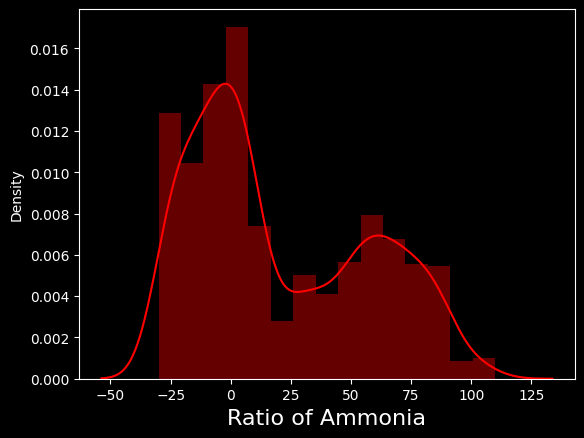

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['Ammonia'], color = 'red')
plt.xlabel('Ratio of Ammonia', fontsize = 16)

<ipython-input-12-9aaf9ab24a2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Nitrite'], color = 'blue')


Text(0.5, 0, 'Ratio of Nitrite')

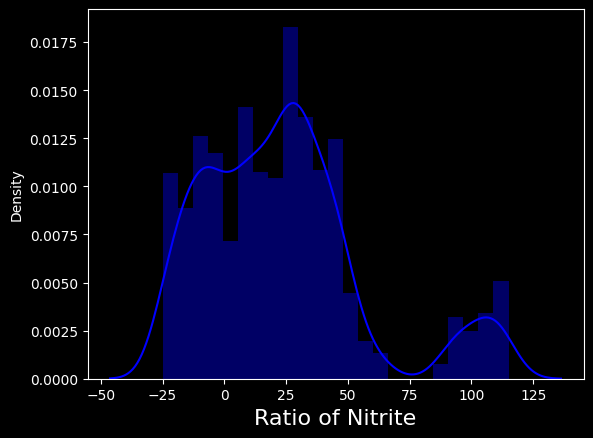

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['Nitrite'], color = 'blue')
plt.xlabel('Ratio of Nitrite', fontsize = 16)

<ipython-input-13-f624e6c18b64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Nitrate'], color = 'orange')


Text(0.5, 0, 'Ratio of Nitrate')

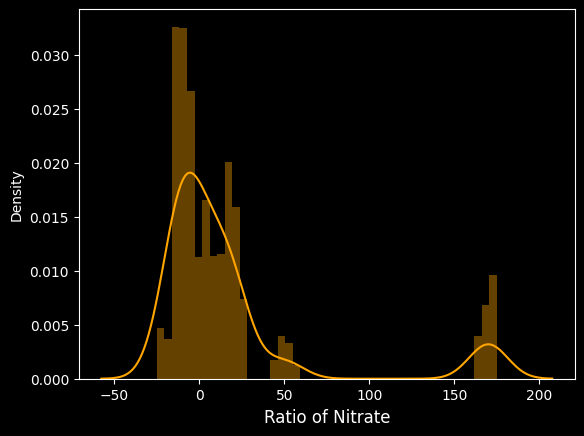

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['Nitrate'], color = 'orange')
plt.xlabel('Ratio of Nitrate', fontsize = 12)

<ipython-input-14-314c99df1d89>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['temperature'], color = 'violet')


Text(0.5, 0, 'Temperature')

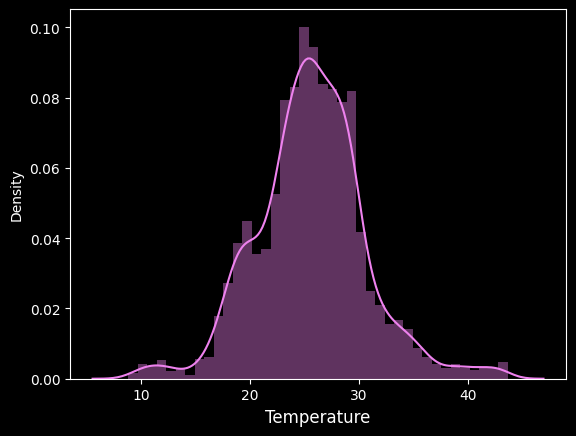

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['temperature'], color = 'violet')
plt.xlabel('Temperature', fontsize = 12)

<ipython-input-15-7d7826294705>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rainfall'], color = 'yellow')


Text(0.5, 0, 'Rainfall')

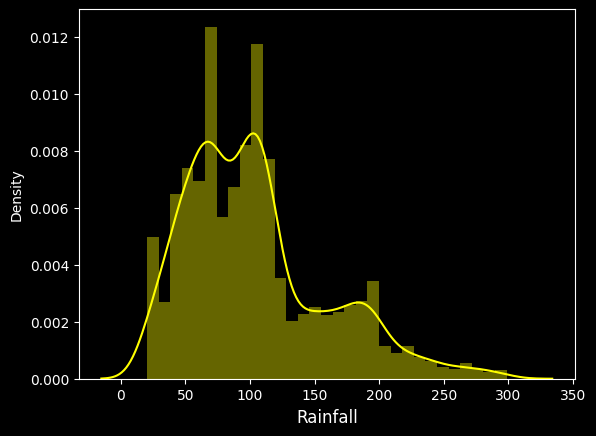

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['rainfall'], color = 'yellow')
plt.xlabel('Rainfall', fontsize = 12)

<ipython-input-16-69b843cbef36>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['humidity'], color = 'green')


Text(0.5, 0, 'Humidity')

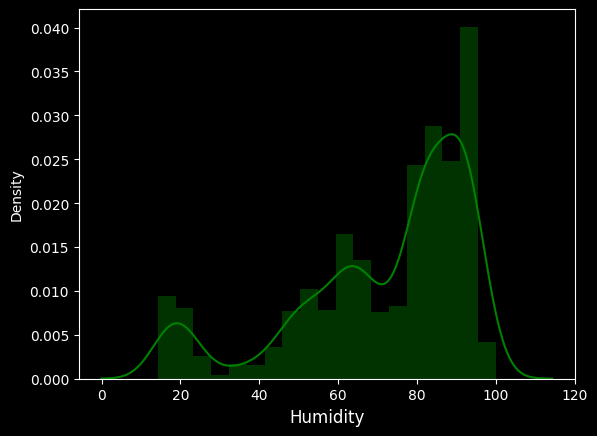

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['humidity'], color = 'green')
plt.xlabel('Humidity', fontsize = 12)

<ipython-input-17-80eab8f38a4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ph'], color = 'pink')


Text(0.5, 0, 'pH Level')

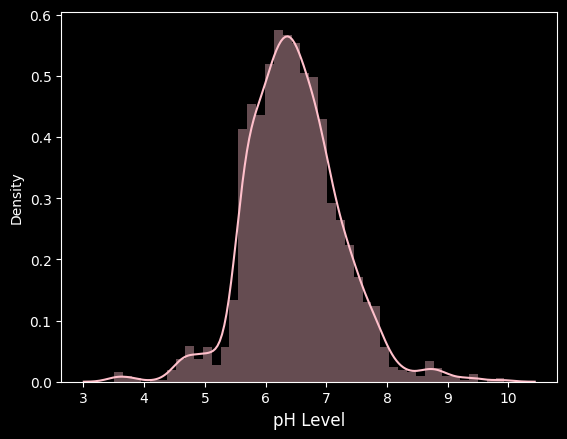

In [ ]:
plt.subplot(1,1,1)
sns.distplot(data['ph'], color = 'pink')
plt.xlabel('pH Level', fontsize = 12)

In [ ]:
print("Some Interesting Patterns")
print("----------------------------------------------------------------------------------------------------------")
print("Fishes which requires very High Ratio of Ammonia Content in Water:", data[data['Ammonia'] > 100]['label'].unique())
print("Fishes which requires very High Ratio of Nitrite Content in Water:", data[data['Nitrite'] > 100]['label'].unique())
print("Fishes which requires very High Ratio of Nitrate content in Water:", data[data['Nitrate'] > 100]['label'].unique())
print("Fishes which requires very High Rainfall", data[data['rainfall']>200]['label'].unique())
print("Fishes which requires very low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Fishes which requires very High Temperature:", data[data['temperature']>40]['label'].unique())
print("Fishes which requires very Low Humidity:", data[data['humidity']< 20]['label'].unique())
print("Fishes which requires very low pHi", data[data['ph']< 4]['label'].unique())
print("Fishes which requires very High pH:", data[data['ph']>9]['label'].unique())

Some Interesting Patterns
----------------------------------------------------------------------------------------------------------
Fishes which requires very High Ratio of Ammonia Content in Water: ['Clown Loaches,']
Fishes which requires very High Ratio of Nitrite Content in Water: ['Tilapia' 'rosy red minnow']
Fishes which requires very High Ratio of Nitrate content in Water: ['Tilapia' 'rosy red minnow']
Fishes which requires very High Rainfall ['Archerfish' 'Danios' 'Black Molly']
Fishes which requires very low Temperature: ['Tilapia']
Fishes which requires very High Temperature: ['Tilapia' 'Danios']
Fishes which requires very Low Humidity: ['Rosy Barb' 'Sterlets']
Fishes which requires very low pHi ['Koi']
Fishes which requires very High pH: ['Koi']


In [ ]:
print("Summer Fishes")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-------------------------------------------------------------------------------")
print("Winter Fishes")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-------------------------------------------------------------------------------")
print("Rainy Fishes")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Fishes
['Rosy Red Minnows' 'Koi' 'Bluegills' 'Catfish' 'Tilapia'
 'pumpkinseed fish' 'Danios']
-------------------------------------------------------------------------------
Winter Fishes
['Goldfish' 'Rosy Red Minnows' 'Fathead Minnows' 'Sticklebacks' 'Tilapia'
 'pumpkinseed fish']
-------------------------------------------------------------------------------
Rainy Fishes
['Archerfish' 'Danios' 'Black Molly']


##Clustering similar Fishes


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Selecting all the columns from the data
x = data.loc[:, ['Ammonia', 'Nitrite', 'Nitrate', 'temperature', 'ph', 'humidity', 'rainfall']].values
#Checking the shape of x
print(x.shape)
#Converting this data into a dataframe
x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,60.0,12.0,13.0,20.879744,6.502985,82.002744,202.935536
1,55.0,28.0,11.0,21.770462,7.038096,80.319644,226.655537
2,30.0,25.0,14.0,23.004459,7.840207,82.320763,263.964248
3,44.0,5.0,10.0,26.491096,6.980401,80.158363,242.864034
4,48.0,12.0,12.0,20.130175,7.628473,81.604873,262.717340


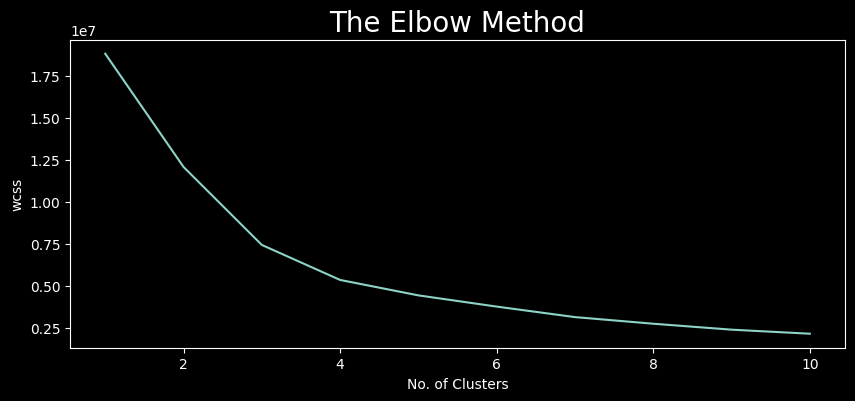

In [ ]:
#Determining the optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=(10,4)

wcss = []
for i in range(1, 11):
  km=KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Implementing the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means=km.fit_predict(x)

#Finding out the Result
a = data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means, a], axis=1)
z=z.rename(columns={0: 'cluster'})

#Checking the Cluster of each Fish
print("Result aftert applying K-Means Algorithm\n")
print("Fishes in First Cluster",z[z['cluster']==0]['label'].unique())
print("------------------------------------------------------------------------------------------------------")
print("Fishes in Second Cluster",z[z['cluster']==1]['label'].unique())
print("------------------------------------------------------------------------------------------------------")
print("Fishes in Third Cluster",z[z['cluster']==2]['label'].unique())
print("------------------------------------------------------------------------------------------------------")
print("Fishes in Fourth Cluster",z[z['cluster']==0]['label'].unique())

Result aftert applying K-Means Algorithm

Fishes in First Cluster ['Goldfish' 'Rosy Barb' 'Sterlets' 'Rosy Red Minnows' 'Koi' 'Redears'
 'Bluegills' 'Fathead Minnows' 'Sticklebacks' 'Catfish' 'pumpkinseed fish'
 'Danios' 'Black Molly']
------------------------------------------------------------------------------------------------------
Fishes in Second Cluster ['Goldfish' 'Golden Rainbow Trout' 'Largemouth Bass' 'Barramundi' 'Danios'
 'Clown Loaches,' 'Rams']
------------------------------------------------------------------------------------------------------
Fishes in Third Cluster ['Tilapia' 'rosy red minnow']
------------------------------------------------------------------------------------------------------
Fishes in Fourth Cluster ['Goldfish' 'Rosy Barb' 'Sterlets' 'Rosy Red Minnows' 'Koi' 'Redears'
 'Bluegills' 'Fathead Minnows' 'Sticklebacks' 'Catfish' 'pumpkinseed fish'
 'Danios' 'Black Molly']


In [ ]:
# Hard Clustering
print("Results for Hard Clustering \n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index [counts >= 50])]
d=d['label'].value_counts()
print("Fishes in Cluster 1:", list(d.index))
print("------------------------------------------------------------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin (counts.index [counts >= 50])]
d=d['label'].value_counts()
print("Fishes in Cluster 2:", list(d.index))
print("------------------------------------------------------------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Fishes in Cluster 3:", list(d.index))
print("------------------------------------------------------------------------------------------------------")
counts = z[z['cluster']== 3]['label'].value_counts()
d = z.loc[z['label'].isin (counts.index[counts >= 50])]
d=d['label'].value_counts()
print("Fishes in Cluster 4:", list(d.index))

Results for Hard Clustering 

Fishes in Cluster 1: ['Rosy Barb', 'Sterlets', 'Koi', 'Redears', 'Bluegills', 'Fathead Minnows', 'Sticklebacks', 'Catfish', 'pumpkinseed fish']
------------------------------------------------------------------------------------------------------
Fishes in Cluster 2: ['Goldfish', 'Golden Rainbow Trout', 'Largemouth Bass', 'Barramundi', 'Clown Loaches,']
------------------------------------------------------------------------------------------------------
Fishes in Cluster 3: ['Tilapia', 'rosy red minnow']
------------------------------------------------------------------------------------------------------
Fishes in Cluster 4: ['Archerfish', 'Rosy Red Minnows', 'Danios', 'Black Molly', 'Bettas', 'Rams']


##Visualizing the Hidden Patterns

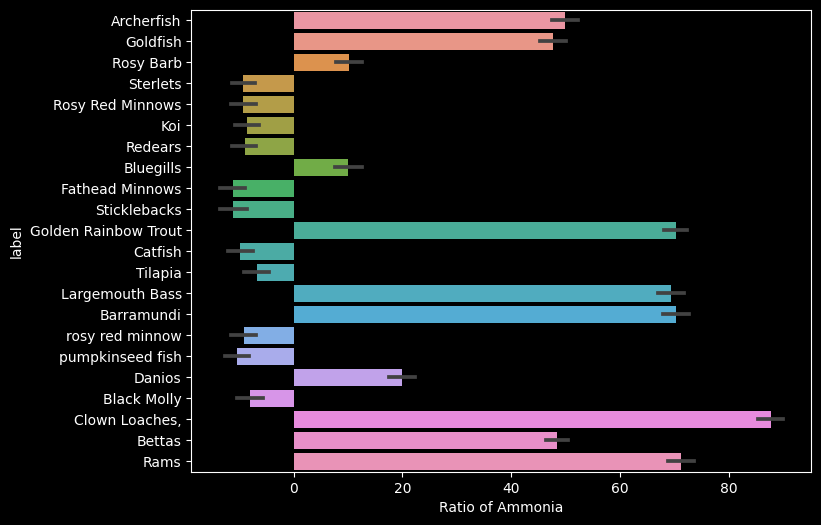

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['Ammonia'], y=data['label'])
plt.xlabel('Ratio of Ammonia', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

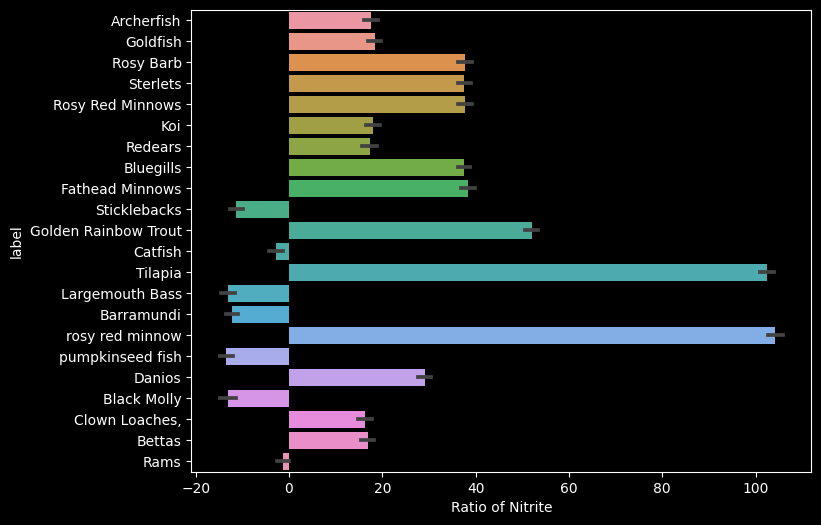

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['Nitrite'], y=data['label'])
plt.xlabel('Ratio of Nitrite', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


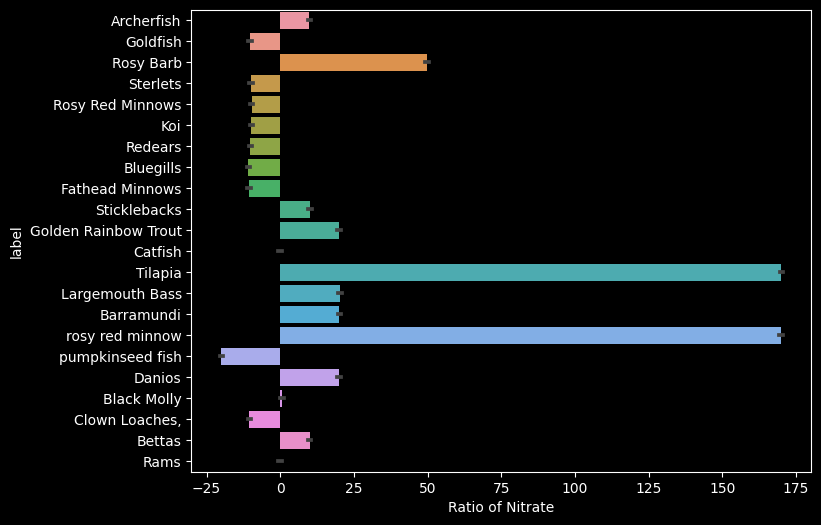

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['Nitrate'], y=data['label'])
plt.xlabel('Ratio of Nitrate', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

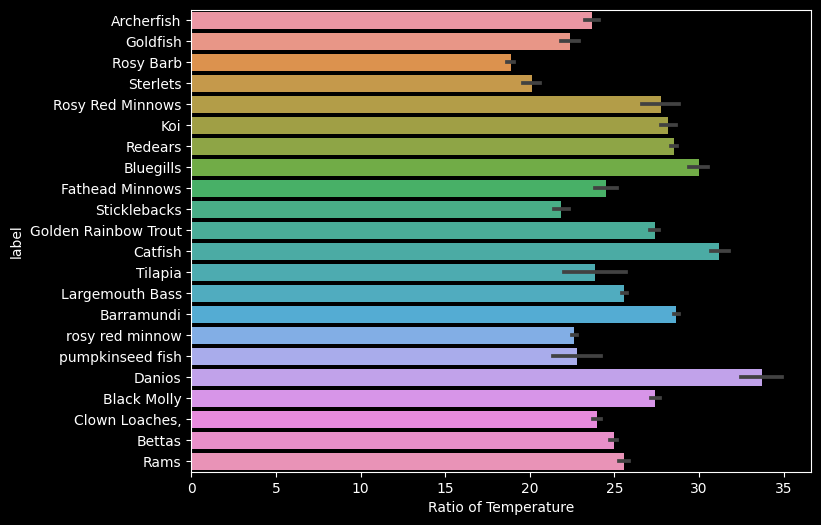

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['temperature'], y=data['label'])
plt.xlabel('Ratio of Temperature', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

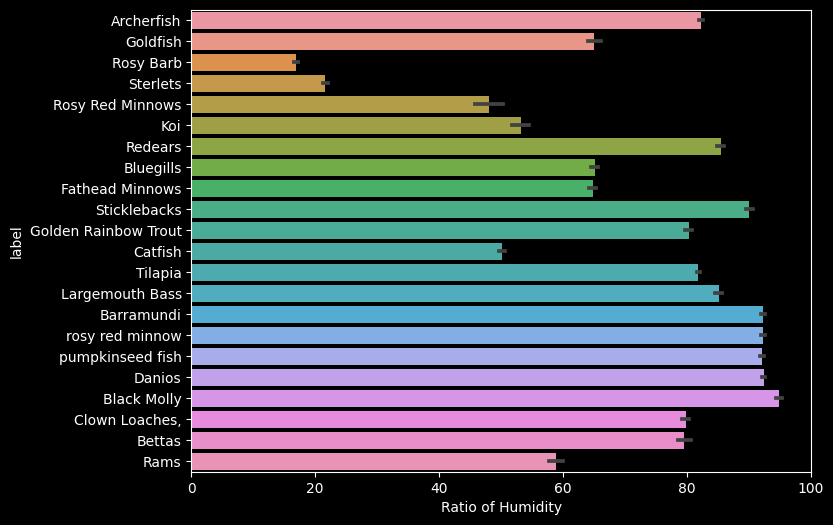

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['humidity'], y=data['label'])
plt.xlabel('Ratio of Humidity', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

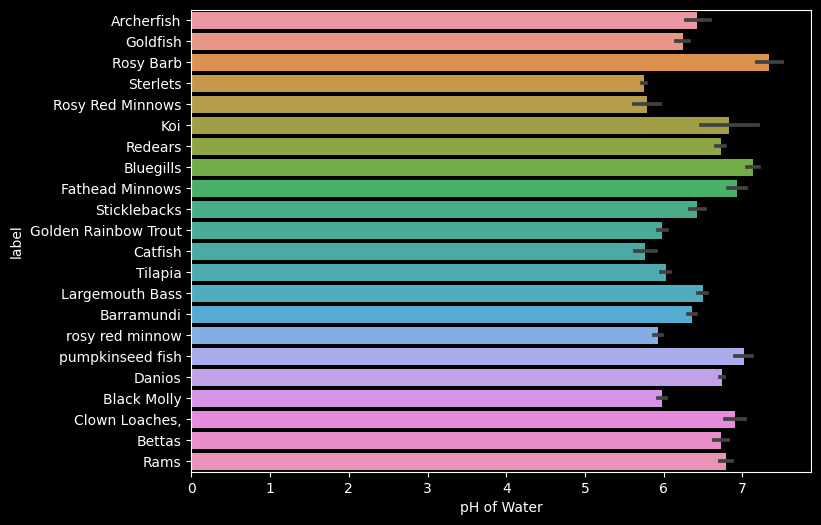

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['ph'], y=data['label'])
plt.xlabel('pH of Water', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

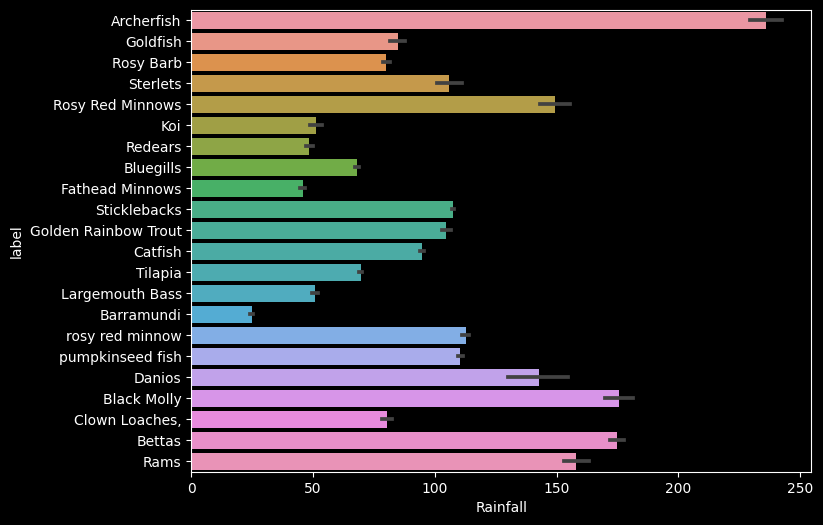

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x=data['rainfall'], y=data['label'])
plt.xlabel('Rainfall', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##Predictive Modelling

In [ ]:
#Splitting Datasets for predictive Modelling
y=data['label']
x=data.drop(['label'],axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [ ]:
#Creating test sets for Validation of Results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.2, random_state = 0)
print("The Shape of x train: ", x_train.shape)
print("The Shape of x test: ", x_test.shape)
print("The Shape of y train: ", y_train. shape)
print("The Shape of y test: ", y_test.shape)

The Shape of x train:  (1760, 7)
The Shape of x test:  (440, 7)
The Shape of y train:  (1760,)
The Shape of y test:  (440,)


In [ ]:
#Creating a Predictive Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

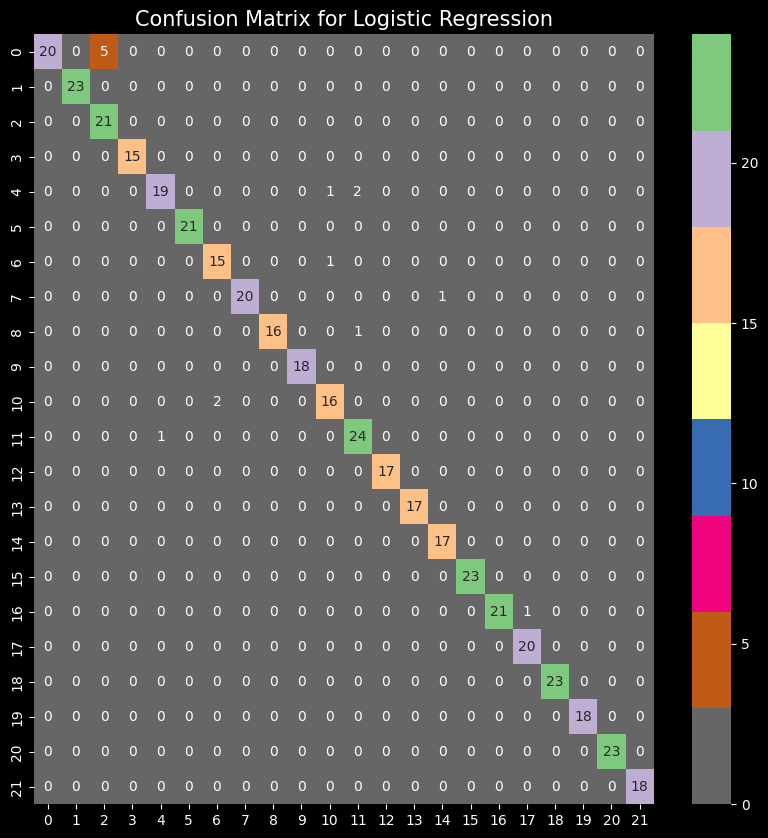

                      precision    recall  f1-score   support

          Archerfish       1.00      0.80      0.89        25
          Barramundi       1.00      1.00      1.00        23
              Bettas       0.81      1.00      0.89        21
         Black Molly       1.00      1.00      1.00        15
           Bluegills       0.95      0.86      0.90        22
             Catfish       1.00      1.00      1.00        21
      Clown Loaches,       0.88      0.94      0.91        16
              Danios       1.00      0.95      0.98        21
     Fathead Minnows       1.00      0.94      0.97        17
Golden Rainbow Trout       1.00      1.00      1.00        18
            Goldfish       0.89      0.89      0.89        18
                 Koi       0.89      0.96      0.92        25
     Largemouth Bass       1.00      1.00      1.00        17
                Rams       1.00      1.00      1.00        17
             Redears       0.94      1.00      0.97        17
       

In [ ]:
# Evaluating the Model Performance
from sklearn.metrics import classification_report, confusion_matrix

#Printing the Confusion Matrix first
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Accent_r')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# Lets print the Classification Report
cr = classification_report (y_test, y_pred)
print(cr)

##**Real Time Predictions**

In [ ]:
data.head()

,Ammonia,Nitrite,Nitrate,temperature,humidity,ph,rainfall,label
0,60,12,13,20.879744,82.002744,6.502985,202.935536,Archerfish
1,55,28,11,21.770462,80.319644,7.038096,226.655537,Archerfish
2,30,25,14,23.004459,82.320763,7.840207,263.964248,Archerfish
3,44,5,10,26.491096,80.158363,6.980401,242.864034,Archerfish
4,48,12,12,20.130175,81.604873,7.628473,262.717340,Archerfish


In [ ]:
prediction = model.predict((np.array([[70,10,10,20,80,7,100]])))
print("The Suggested fish for Given Climatic Condition is:", prediction)

The Suggested fish for Given Climatic Condition is: ['Clown Loaches,']


In [ ]:
data[data['label']=='Danios'].head()

,Ammonia,Nitrite,Nitrate,temperature,humidity,ph,rainfall,label
1700,31,38,20,35.214628,91.497251,6.793245,243.074507,Danios
1701,28,16,15,42.394134,90.790281,6.576261,88.466075,Danios
1702,15,17,25,38.419163,91.142204,6.751453,119.265388,Danios
1703,9,35,23,35.332949,92.115086,6.560743,235.613359,Danios
1704,1,38,15,42.923253,90.076005,6.938313,196.240824,Danios


In [ ]:
prediction = model.predict((np.array([[20,30,10,15,90,7.5,100],[70,10,10,20,80,7,100]])))
print("The Suggested Fish for Given Climatic Condition is:", prediction)

The Suggested Fish for Given Climatic Condition is: ['Danios' 'Clown Loaches,']


#**Result**

**Thus** here multi-class Classification has been performed and Prediction is done that which Fish can be cultivated in the given condition.